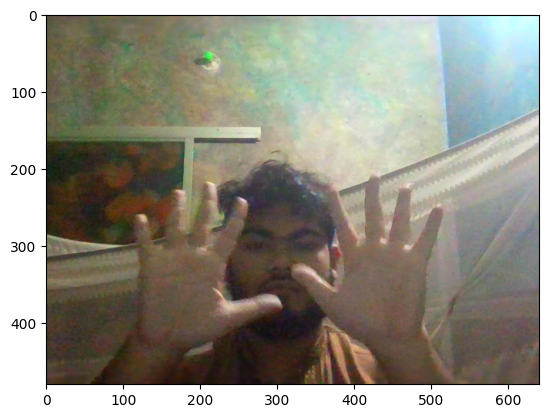

In [35]:
import matplotlib.pyplot as plt
import cv2

cap = cv2.VideoCapture(0)

success,img = cap.read()
cap.release()

img_flip = cv2.flip(img, 1)
img_rgb = cv2.cvtColor(img_flip, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [36]:
import mediapipe as mp

cap = cv2.VideoCapture(0)
mp_hands = mp.solutions.hands
    # shortcut for hands module
    # provides everything needed for hand detection and landmark tracking

hand_model = mp_hands.Hands(
    # creating Hands object  
    # loads hand detection + hand landmark model

    static_image_mode=False,
    max_num_hands=2,
    model_complexity=1,
        # (0-2), higher, accurate, slower
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

mp_draw = mp.solutions.drawing_utils
    # loads drawing utilies module

results = hand_model.process(img_rgb)
    # returns a Results object containing:
        # results.multi_hand_landmarks
            # list of 21 landmarks per hand
        # results.multi_handedness 
            # left/right hand classification
        # results.multi_hand_world_landmarks 
            # optional 3D landmarks

e:\projects\hand_track_num_detect\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
results.multi_hand_landmarks
    # returns a list of hands
    # results[0] = 1st detected hand landmarks

hand1_landmarks = results.multi_hand_landmarks[0].landmark
    # returns the landmark points of 1st hand 
    # in a list like iterable object of length 21

In [18]:
for hand_lms in results.multi_hand_landmarks:
    for id, lm in enumerate(hand_lms.landmark):
        # lm.x → normalized x coordinate (0..1)
        # lm.y → normalized y coordinate (0..1)
        # lm.z → depth-like value, relative to wrist
        print(f'{id} : {lm}')

0 : x: 0.24203828
y: 0.878222823
z: 4.34209852e-007

1 : x: 0.304609329
y: 0.861784935
z: -0.0281221066

2 : x: 0.358812422
y: 0.808923066
z: -0.0376113467

3 : x: 0.404511333
y: 0.767125905
z: -0.0458942

4 : x: 0.443858743
y: 0.743592441
z: -0.0540959

5 : x: 0.327184081
y: 0.679645896
z: -0.0165157653

6 : x: 0.356600404
y: 0.599472761
z: -0.0301135387

7 : x: 0.372223675
y: 0.550247908
z: -0.0428918563

8 : x: 0.383103281
y: 0.506163955
z: -0.0531960763

9 : x: 0.286198676
y: 0.661066115
z: -0.0162509438

10 : x: 0.298540175
y: 0.567412317
z: -0.027400177

11 : x: 0.306616336
y: 0.5111022
z: -0.0403512865

12 : x: 0.310982049
y: 0.465193182
z: -0.050382

13 : x: 0.246094525
y: 0.666161895
z: -0.0198678356

14 : x: 0.246901125
y: 0.58417964
z: -0.0330019593

15 : x: 0.248884499
y: 0.536144257
z: -0.0454454534

16 : x: 0.251839221
y: 0.494408816
z: -0.0545454472

17 : x: 0.208023816
y: 0.690410674
z: -0.0266593192

18 : x: 0.19764334
y: 0.63143146
z: -0.0410214476

19 : x: 0.19047853

In [20]:
h,w,c = img.shape
pixel_x = int(lm.x*w)
pixel_y = int(lm.y*h)

print(pixel_x)
print(pixel_y)

498
264


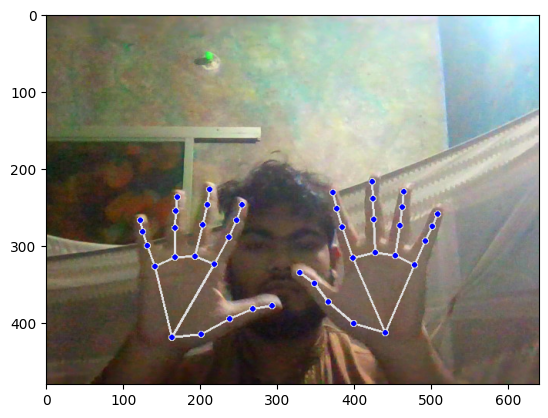

In [39]:
hand1_lms = results.multi_hand_landmarks[0]
hand2_lms = results.multi_hand_landmarks[1]

mp_draw.draw_landmarks(img_rgb, hand1_lms, mp_hands.HAND_CONNECTIONS)
mp_draw.draw_landmarks(img_rgb, hand2_lms, mp_hands.HAND_CONNECTIONS)

plt.imshow(img_rgb)


In [ ]:
import mediapipe as mp

mp_hands = mp.solutions.hands
    # hands module

hand_model = mp_hands.Hands(
    # creating Hands object
)

In [ ]:
while cap.isOpened():
    success, img = cap.read()

    if not success:
        break

    img = cv2.flip(img, 1)
        # fliping image to get mirror feel
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # convert color(cvtColor) from on color space to another
        # cv2.COLOR_BGR2RGB gives color code (integer)

    results = hands.process(img_rgb)
        # process method runs hand detection + landmark estimation on the image
        # returns 
